In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io

from utils.utils import read_active_data_to_df, read_active_data_to_dict

In [2]:
root_path = os.path.join(os.getcwd(),) #os.path.join(os.path.dirname(__file__),)
subject_ids = [0,1]
dynamics = ['Additive','Multiplicative']

In [3]:
###read data and save data
#csv
df = read_active_data_to_df(root_path = root_path, 
                            dynamics = dynamics, 
                            subject_ids = subject_ids)
df.to_csv(os.path.join(root_path, 'data', 'all_data.csv'), sep='\t')

#.mat
datadict = read_active_data_to_dict(root_path = root_path, 
                                dynamics = dynamics, 
                                subject_ids = subject_ids)
scipy.io.savemat(os.path.join(os.path.join(root_path,'data','all_data.mat')),datadict,oned_as='row')
np.savez(os.path.join(os.path.join(root_path,'data','all_data.mat.npz')),datadict = datadict)

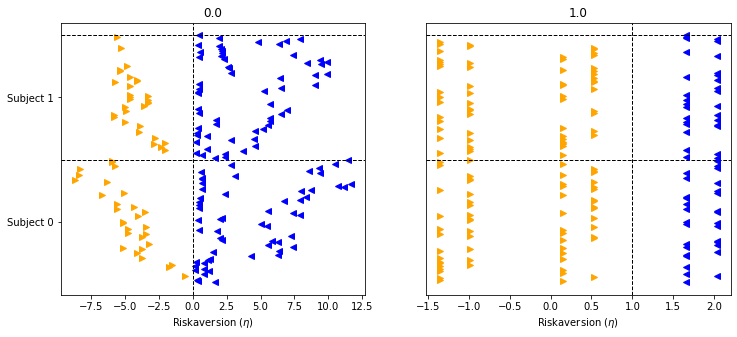

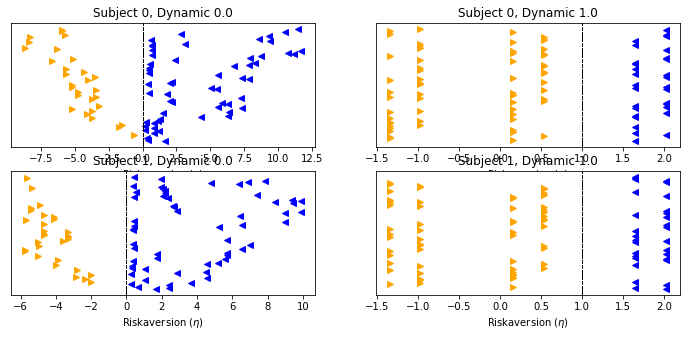

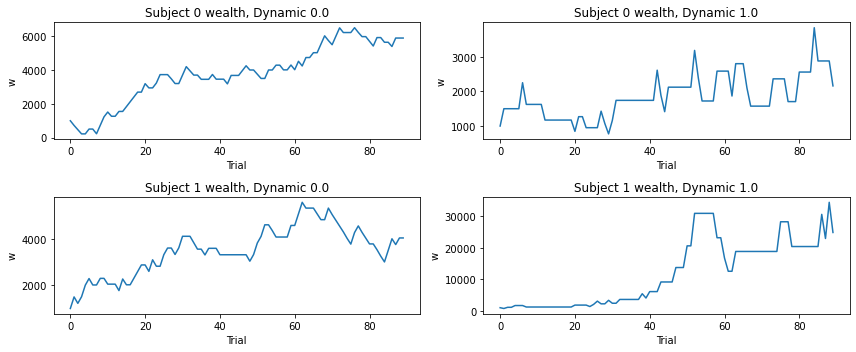

In [4]:
###create indifference eta plot
fig_dynamic, ax_dynamic = plt.subplots(1,len(set(df.eta)),figsize = (12,5))
fig_subject, ax_subject = plt.subplots(len(set(df.subject_id)),len(set(df.eta)),figsize = (12,5))
fig_subject_wealth, ax_subject_wealth = plt.subplots(len(set(df.subject_id)),len(set(df.eta)),figsize = (12,5))

for dynamic_idx, dynamic in enumerate(set(df.eta)):
    trial_counter = 0
    tick_place = [0]
    tick_names = []
    for subject_idx, subject in enumerate(set(df.subject_id)):
        trial_counter_participant = 0
        tick_names.append(f'Subject {subject}')
        df_tmp = df.query('eta == @dynamic and subject_id == @subject').reset_index(drop=True)
        for ii, choice in enumerate(df_tmp['selected_side_map']):
            trial_counter += 1
            trial_counter_participant += 1
            trial = df_tmp.loc[ii,:]
            if np.isnan(trial.indif_eta):
                continue
            
            ax_subject[subject_idx,dynamic_idx].plot(trial.indif_eta, ii, marker=trial.min_max_sign, color = trial.min_max_color)
            ax_dynamic[dynamic_idx].plot(trial.indif_eta, trial_counter, marker=trial.min_max_sign, color = trial.min_max_color)
            
            ax_subject[subject_idx,dynamic_idx].set_title(f'Subject {subject}, Dynamic {dynamic}')
            ax_subject[subject_idx,dynamic_idx].set_xlabel('Riskaversion ($\eta$)')
            ax_subject[subject_idx,dynamic_idx].axes.yaxis.set_visible(False)
            ax_subject[subject_idx,dynamic_idx].axvline(dynamic, linestyle='--', linewidth=1, color='k')
            
        ax_subject_wealth[subject_idx,dynamic_idx].plot(df_tmp.index,df_tmp.wealth)
        ax_subject_wealth[subject_idx,dynamic_idx].set_title(f'Subject {subject} wealth, Dynamic {dynamic}')
        ax_subject_wealth[subject_idx,dynamic_idx].set_xlabel('Trial')
        ax_subject_wealth[subject_idx,dynamic_idx].set_ylabel('w')
            
        ax_dynamic[dynamic_idx].axhline(trial_counter, linestyle='--', linewidth=1, color='k')
        tick_place.append(trial_counter - trial_counter_participant / 2)
    if dynamic_idx == 0:
        ax_dynamic[dynamic_idx].set_yticks(tick_place[1:])
        ax_dynamic[dynamic_idx].set_yticklabels(tick_names, minor=False)
    else:
        ax_dynamic[dynamic_idx].axes.yaxis.set_visible(False)
    
    ax_dynamic[dynamic_idx].set_xlabel('Riskaversion ($\eta$)')
    ax_dynamic[dynamic_idx].set_title(dynamic)
    ax_dynamic[dynamic_idx].axvline(dynamic, linestyle='--', linewidth=1, color='k')
plt.tight_layout()
plt.show()